# Part A Baseline Comparisons

Threshold | Precision | Recall | Accuracy | F1-score
--------------------------------------------------

Best Threshold Found:
Optimal Threshold: 0.00293
Best Precision: 0.7368
Best Recall: 0.8909
Best Accuracy: 0.7283
Best F1-score: 0.8066

Confusion Matrix:
[[28 35]
 [12 98]]

Sample of Classified Data:
    max_score_mixedbread_new_val  Author Labeling Binary  Predicted Label  \
3                         0.0078                     1.0                1   
4                         0.0068                     1.0                1   
6                         0.0066                     1.0                1   
13                        0.0035                     1.0                1   
17                        0.0048                     1.0                1   

   Final Classification  
3              relevant  
4              relevant  
6              relevant  
13             relevant  
17             relevant  


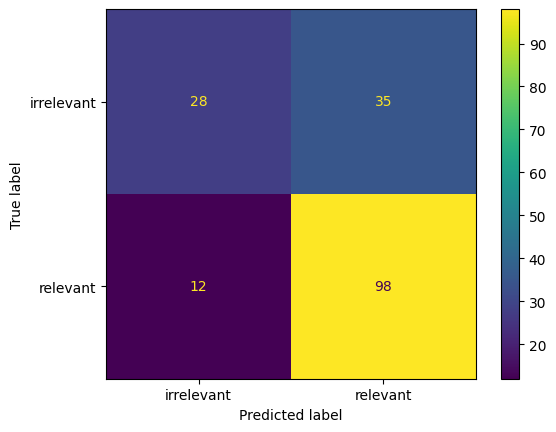

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    confusion_matrix, precision_recall_fscore_support, accuracy_score, ConfusionMatrixDisplay
)

# Load the dataset
df = pd.read_csv("ann_dataset_misleading.csv")

# Map labels to binary classes
df['Author Labeling Binary'] = df['Final Labeling'].map({
   # 'irrelevant': 0,
    'refuting': 0,
    'supporting': 1
})

# Remove NaN values in relevant columns
df = df.dropna(subset=['ctd_new_val', 'Author Labeling Binary'])

# Sweep through thresholds to find the best one based on F1-score
thresholds = np.linspace(df['ctd_new_val'].min(), df['ctd_new_val'].max(), 500)
best_threshold = None
best_f1 = -1  # Initialize with a low F1-score
best_metrics = {}
best_accuracy = -1  # Initialize with a low F1-score

print("Threshold | Precision | Recall | Accuracy | F1-score")
print("-" * 50)

for threshold in thresholds:
    # Predict labels based on the threshold
    df['Predicted Label'] = (df['ctd_new_val'] >= threshold).astype(int)

    # Compute precision, recall, F1-score, and accuracy
    precision, recall, f1, _ = precision_recall_fscore_support(
        df['Author Labeling Binary'], df['Predicted Label'], average='binary'
    )
    accuracy = accuracy_score(df['Author Labeling Binary'], df['Predicted Label'])

    # Print the metrics for each threshold
   # print(f"{threshold:.5f} | {precision:.4f} | {recall:.4f} | {accuracy:.4f} | {f1:.4f}")

    # Update best threshold if F1-score is improved
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
        best_metrics = {
            "Precision": precision,
            "Recall": recall,
            "Accuracy": accuracy,
            "F1-score": f1
        }

# Apply the best threshold for final classification
df['Predicted Label'] = (df['ctd_new_val'] >= best_threshold).astype(int)
df['Final Classification'] = df['Predicted Label'].map({0: 'refuting', 1: 'supporting'})

# Print the best threshold and its metrics
print("\nBest Threshold Found:")
print(f"Optimal Threshold: {best_threshold:.5f}")
print(f"Best Precision: {best_metrics['Precision']:.4f}")
print(f"Best Recall: {best_metrics['Recall']:.4f}")
print(f"Best Accuracy: {best_metrics['Accuracy']:.4f}")
print(f"Best F1-score: {best_metrics['F1-score']:.4f}")

# Generate and print the Confusion Matrix
y_true = df['Author Labeling Binary']
y_pred = df['Predicted Label']
conf_matrix = confusion_matrix(y_true, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['refuting', 'supporting']).plot()

# Save the results
#df.to_csv("classified_stance_results_temp_2.csv", index=False)

# Display a sample of the classified DataFrame
print("\nSample of Classified Data:")
print(df[['max_score_mixedbread_new_val', 'Author Labeling Binary', 'Predicted Label', 'Final Classification']].head())

Precision: 0.9783
Recall:    1.0000
F1-score:  0.9890
Accuracy:  0.9802

Confusion Matrix:
[[ 9  2]
 [ 0 90]]

Sample of Classified Data:
  ctd_new_val Final Labeling  Predicted Label Final Classification
0    supports       refuting                1             refuting
1    supports       refuting                1             refuting
2    supports       refuting                1             refuting
3    supports       refuting                1             refuting
4     refutes       refuting                1             refuting


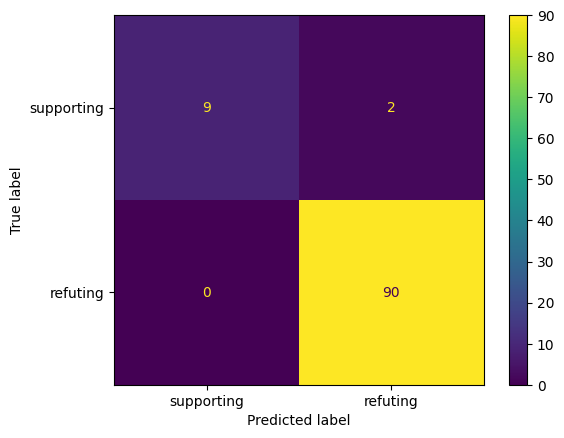

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    confusion_matrix, precision_recall_fscore_support, accuracy_score, ConfusionMatrixDisplay
)

# Load data
df = pd.read_csv("ann_dataset_misleading.csv")

# Filter out 'irrelevant' rows
df = df[df['Final Labeling'].isin(['refuting', 'supporting'])]

# Map Final Labeling to binary (ground truth)
df['Author Labeling Binary'] = df['Final Labeling'].map({
    'refuting': 1,
    'supporting': 0
})

# Map ctd_new_val to binary predictions
df['Predicted Label'] = df['stance_internvl_api_final'].map({
    'refuting': 1,
    'supporting': 0
})

# Drop rows where prediction or label is missing
df = df.dropna(subset=['Author Labeling Binary', 'Predicted Label'])

# Compute metrics
precision, recall, f1, _ = precision_recall_fscore_support(
    df['Author Labeling Binary'], df['Predicted Label'], average='binary'
)
accuracy = accuracy_score(df['Author Labeling Binary'], df['Predicted Label'])

# Confusion matrix
conf_matrix = confusion_matrix(df['Author Labeling Binary'], df['Predicted Label'])

# Output results
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"Accuracy:  {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=[ 'supporting','refuting']
).plot()

# Final human-readable label
df['Final Classification'] = df['Predicted Label'].map({ 0: 'supporting',1: 'refuting'})

# Optional: save
# df.to_csv("binary_results_filtered.csv", index=False)

# Show sample
print("\nSample of Classified Data:")
print(df[['ctd_new_val', 'Final Labeling', 'Predicted Label', 'Final Classification']].head())